                    Нижегородский государственный университет имени Н. И. Лобачевского

                                          Радиофизический факультет

                                            Кафедра математики
                                            
####                                                                                              Отчет по лабораторной работе "Поиск экстремума функции многих переменных"

                                              
                                                 Вариант 2
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                               Выполнила: Зибаова Александра, 430 гр.
                                                                               Проверил: Шиндин А. В.

                                         Нижний Новгород, 2016 год.
                                    

###  Содержание
1. Постановка задачи
2. Цели работы
3. Описание используемых алгоритмов
4. Исходный код программы
5. Результаты работы программы
6. Анализ результатов 


###   1. Постановка задачи.
1. Найти точку минимума функции $$f(x_1,x_2,x_3)=(x_1-2.5)^4+(x_2-0.7)^2+3(x_3-0.2)^2-2.5$$ методом **наискорейшего спуска**. Для одномерной минимизации использовать **метод золотого сечения**. Начальной точкой итерационного метода принять $$[(x_1)^0=-1; (x_2)^0=-3; (x_3^0)=2]$$

2. В окрестности точки минимума оценить овражность, построить линии уровня и траектории поиска.

3. Исследовать условия сходимости.

4. Обеспечить работу программы с исходной функцией в режиме "черного ящика"

5. Обеспечить работу программы с функциями любой размерности (от 1 до 10 включительно)


###   2. Цель работы
* Освоить численные методы поиска экстремума функций одной переменной и функций многих переменных. Найти минимум заданной функции с использованием **метода наискорейшего спуска** (с применением метода **золотого сечения** для минимизации функции одной переменной) с относительной точностью **0,01**
* Универсализировать написанную программу для любой функции любого количества переменных

###   3. Описание используемых алгоритмов
#### 3.1 Поиск минимума функции методом наискорейшего спуска
Метод наискорейшего спуска - метод первого порядка, на каждом шаге которого вектор спуска $p^k$ совпадает с направлением антиградиента функции $f(x)$
В методе строится итерационная последовательность $$x^(k+1)=x^k+a_kp^k$$ Причем $a_k$ на каждом шаге выбирается из условия минимума функции $f(x)$ вдоль направления $p^k$: $$f(x^k+a_kp^k)=\min_{n>0}\left(f(x^k+a_kp^k)\right)$$
Таким образом, в методе наискорейшего спуска на каждом шаге требуется ршеать задачу минимизации функции одной меременной.
#### 3.2 Поиск минимума функции методом золотого сечения
Метод основан на разбиении отрезка неопределенности на 2 части в отношении "золотого сечения". При этом отношение длины всего отрезка к большей части равно отношению большей части к меньшей и равно числу
$$\tau=2^{-1}(1+\sqrt{5})\approx{1.62}$$
На каждом шаге метода отрезок делится на 3 части, причем (если a и b - левый и правый концы отрезка соответственно) точки выбираются по правилу
$$x^1=b-\frac{b-a}{\tau}$$
$$x^2=a+\frac{b-a}{\tau}$$
Если $f(x^1)<f(b)$, то b присваивается значение $x^1$. Если $f(x^2)<f(а)$, то а присваивается значение $x^2$. И так далее, пока необходимая точность не будет достигнута.
#### 3.2 Условие сходиомсти. Овражность.
Сходимость любого метода зависит от выбора исследуемой функции, начальной точки и параметров итерационного процесса.
Известно, что (для дважды дифференцируемой сильно выпуклой функции, каковой и является исследуемая функция) если матрица Гессе положительно определенная и ограниченная, то функция имеет единственную точку минимума, к которой итерационная последовательность сходится с линейной скоростью.
При этом показателем овражности в окрестности точки минимума называют отношение наибольшего собственного числа матрицы Гессе к наименьшему.

###   4. Исходный код программы

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy.linalg as lin
import pylab
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
%matplotlib inline 


####   4. 1 Задание функции

In [86]:
n=3 #количество переменных#
def f(X):
    return (X[0]-2.5)**4+(X[1]-0.7)**2+3*(X[2]-0.2)**2-2.5

Xo=np.zeros((n)) #начальная точка#
Xo[0]=x0=-1; Xo[1]=y0=-3; Xo[2]=z0=2

Eps=0.001

print('Решается задача по нахождению экстремума функции',n, 'переменных с начальной точной', Xo, 'с относительной точностью',Eps)

Решается задача по нахождению экстремума функции 3 переменных с начальной точной [-1. -3.  2.] с относительной точностью 0.001


####   4. 2 Определение функций для вычисления градиента и гессиана

In [93]:
def grad(f,X):
    grad=np.zeros((n))
    for t in range (0,n):
        def fi(X):
            Xprir=np.zeros((n))
            Xprir[t]=Eps
            proizvodnaya=(f(X+Xprir)-f(X-Xprir))/(2*Eps)
            return proizvodnaya
        grad[t]=-fi(X)
    return grad    
print(grad(f,Xo), 'proizvodnaya')        

[ 171.500014    7.4       -10.8     ] proizvodnaya


In [94]:
def Hess(f,X):
    hess=np.zeros((n,n))
    for i in range(0,n):
        def gri(X):
            return grad(f,X)[i]
        grad1=np.zeros((n))
        for t in range (0,n):
            def fij(X):
                Xprir=np.zeros((n))
                Xprir[t]=Eps
                proizvodnaya=(gri(X+Xprir)-gri(X-Xprir))/(2*Eps)
                return proizvodnaya
            hess[i,t]=-fij(X)
    return hess   
print(Hess(f,Xo))    


[[ 147.000008   -0.         -0.      ]
 [  -0.          2.         -0.      ]
 [  -0.         -0.          6.      ]]


In [118]:
from mpl_toolkits.mplot3d import Axes3D
def fss(x,y,z):
    return (x-2.5)**4+(y-0.7)**2+3*(z-0.2)**2-2.5

def fsz(x,y):
    return fss(x,y,0.2)
def fsy(x,z):
    return fss(x,0.7,z)
def fsx(y,z):
    return fss(2.5,y,z)


####   4. 3 Поиск минимума функции 3 переменных

In [90]:
grad=np.zeros((3))
Xk=np.zeros((3))
x1=Xo[0]; y1=Xo[0]; z1=Xo[0]
X1=Xo
for i in range (0,40):
    grad=np.zeros((n))
    for t in range (0,n):
        def fi(X):
            Xprir=np.zeros((n))
            Xprir[t]=Eps
            return (f(X+Xprir)-f(X-Xprir))/(2*Eps)
        grad[t]=-fi(X1)
    def falph(a):
        return f(X1+a*grad)
    left=-10; right=10
    for j in range (0,20):
        und1=left+(right-left)/1.62
        und2=right-(right-left)/1.62  
        if falph(und1)<falph(left):
            left=und1
        if falph(und2)<falph(right):
            right=und2
        a=right
        if abs(und1-und2)/abs(und1)<Eps:
            break
       
    X2=X1    
    X1=X2+right*grad
    if i==0:
        X3=X1
    else:
        X3=np.vstack((X3,X1))
    DEL=lin.norm(X2-X1)/lin.norm(X2)
    if DEL<Eps:
        break
print(X1, f(X1))
print(Xo, f(Xo))
Xpoisk=np.zeros((len(X3))); Ypoisk=np.zeros((len(X3))) ; Zpoisk=np.zeros((len(X3)))
for i in range(0, len(X3)):
    Xpoisk[i]=X3[i,0]
    Ypoisk[i]=X3[i,1]
    Zpoisk[i]=X3[i,2]


[ 2.61126236  0.69999982  0.19913025] -2.49984448324
[-1. -3.  2.] 170.9725


####   4. 4 "Черный ящик". Работает вне зависимости от количества переменных функции

In [91]:
def extr(f,n,Xo,Eps):
    grad=np.zeros((3))
    Xk=np.zeros((3))
    x1=Xo[0]; y1=Xo[0]; z1=Xo[0]
    X1=Xo
    for i in range (0,100):
        grad=np.zeros((n))
        for t in range (0,n):
            def fi(X):
                Xprir=np.zeros((n))
                Xprir[t]=Eps
                return (f(X+Xprir)-f(X-Xprir))/(2*Eps)
            grad[t]=-fi(X1)
        def falph(a):
            return f(X1+a*grad)
        left=-10; right=10
        for j in range (0,200):
            und1=left+(right-left)/1.62
            und2=right-(right-left)/1.62  
            if falph(und1)<falph(left):
                left=und1
            if falph(und2)<falph(right):
                right=und2
            a=right
            if abs(und1-und2)/abs(und1)<Eps:
                break
        X2=X1    
        X1=X2+right*grad
        DEL=lin.norm(X2-X1)/lin.norm(X2)
        if DEL<Eps:
            break
    return X1

###   5. Результат работы программы
####   5.1 Срезы заданной функции в начальной точке

srez z=2


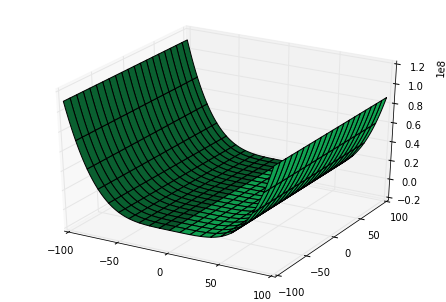

srez y=-3


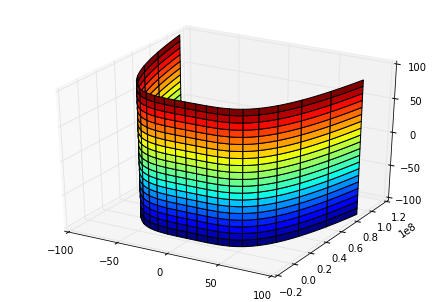

srez x=-1


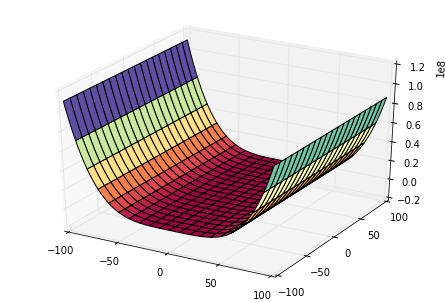

In [121]:
print('srez z=2')
def makeSrezZ ():
    xsr = np.arange (-100, 100, 1)
    ysr = np.arange (-100, 100, 1)
    xgrid, ygrid = np.meshgrid(xsr, ysr)

    zgrid = fsz(xgrid,ygrid)
    return xgrid, ygrid, zgrid
x, y, z = makeSrezZ()

fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x, y, z, color='#11aa55')
pylab.show()

print('srez y=-3')
def makeSrezY ():
    xsr = np.arange (-100, 100, 1)
    zsr = np.arange (-100, 100, 1)
    xgrid, zgrid = np.meshgrid(xsr, zsr)

    ygrid = fsy(xgrid,zgrid)
    return xgrid, ygrid, zgrid
x, y, z = makeSrezY()

fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x, y, z, cmap = cm.jet )
pylab.show()

print('srez x=-1')
def makeSrezX ():
    ysr = np.arange (-10, 10, 0.1)
    zsr = np.arange (-10, 10, 0.1)
    ygrid, zgrid = np.meshgrid(ysr, zsr )

    xgrid = fsx(ygrid,zgrid)
    return xgrid, ygrid, zgrid
x, y, z = makeSrezZ()

fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x, y, z, cmap=cm.Spectral)
pylab.show()

####   5.2 Точка минимума функции

In [96]:
print(X1,'- найденная точка минимума', f(X1), '- значение функции в ней')
print(Xo,'- начальная точка', f(Xo), '- значение функции в ней')

[ 2.61126236  0.69999982  0.19913025] - найденная точка минимума -2.49984448324 - значение функции в ней
[-1. -3.  2.] - начальная точка 170.9725 - значение функции в ней


####   5.2 Проверка выполнения необходимого условия экстремума - равенство нулю градиента

In [98]:
print(grad(f,X1), ' - градиент функции в конечной точке')
print(lin.norm(grad(f,X1)), ' - норма градиента функции в конечной точке')
print('таким образом, с учетом заданной точности точка подозрительна на экстремум')

[ -5.50985065e-03   3.57768926e-07   5.21850662e-03]  - градиент функции в конечной точке
0.00758889093225  - норма градиента функции в конечной точке
таким образом, с учетом заданной точности точка подозрительна на экстремум


####   5.3 Построение линий уровня и траекторий поиска

линии уровня при z=0.2. Черной линией показана траектоория поиска


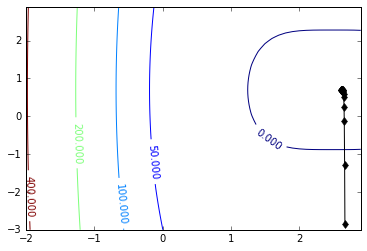

линии уровня при y=0.7. Черной линией показана траектоория поиска


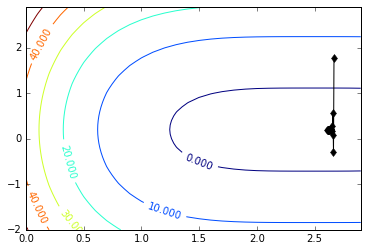

линии уровня при y=0.7. Черной линией показана траектоория поиска


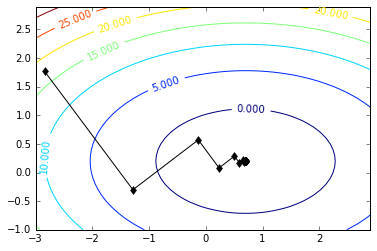

In [99]:
print('линии уровня при z=0.2. Черной линией показана траектоория поиска')
def LineZ():
    x=np.arange(-2,3,0.1)
    y=np.arange(-3,3,0.1)
    xgrid, ygrid = np.meshgrid(x, y)
    zgrid=fss(xgrid,ygrid,0.2)
    return xgrid,ygrid,zgrid
if __name__=='__main__':
    x,y,z=LineZ()
    levels1=[0, 50, 100, 200, 400]
    cs1=pylab.contour(x, y, z, levels1)
    pylab.clabel(cs1)
    plt.plot(Xpoisk, Ypoisk, marker ="d" , color="black")
    pylab.show()
print('линии уровня при y=0.7. Черной линией показана траектоория поиска')
def LineY():
    x=np.arange(-2,3,0.1)
    z=np.arange(0,3,0.1)
    xgrid, zgrid = np.meshgrid(z, x)
    ygrid=fss(xgrid,0.7,zgrid)
    return xgrid,zgrid,ygrid
if __name__=='__main__':
    x,z,y=LineY()
    cs2=pylab.contour(x, z, y)
    pylab.clabel(cs2)
    plt.plot(Xpoisk, Zpoisk, marker ="d" , color="black")
    pylab.show()   
print('линии уровня при y=0.7. Черной линией показана траектоория поиска')
def LineY():
    y=np.arange(-3,3,0.1)
    z=np.arange(-1,3,0.1)
    ygrid, zgrid = np.meshgrid(y, z)
    xgrid=fss(2.5,ygrid,zgrid)
    return ygrid,zgrid,xgrid
if __name__=='__main__':
    y,z,x=LineY()
    cs2=pylab.contour(y, z, x)
    pylab.clabel(cs2)
    plt.plot(Ypoisk, Zpoisk, marker ="d" , color="black")
    pylab.show()   
        

####   5.4 Исследование условий сходимости. Оценка овражности

In [102]:
Hissl=Hess(f,Xo)
print(Hissl, '- матрица Гессе в заданной начальной точке')
KYst=lin.eigvals(Hissl)
print(KYst, ' - собственные числа матрицы. Они положительны, следовательно, матрица Гессе в выбранной начальной точке положительно определенная. Значит, при выбранной начальной точке последовательность сходится к точке минимума с линейной скоростью.')
print(max(KYst)/min(KYst),' - показатель овражности')

[[ 147.000008   -0.         -0.      ]
 [  -0.          2.         -0.      ]
 [  -0.         -0.          6.      ]] - матрица Гессе в заданной начальной точке
[ 147.000008    2.          6.      ]  - собственные числа матрицы. Они положительны, следовательно, матрица Гессе в выбранной начальной точке положительно определенная. Значит, при выбранной начальной точке последовательность сходится к точке минимума с линейной скоростью.
73.500003924  - показатель овражности


####   5.5 Работа "черного ящика"

In [112]:
def h(X):
    return (X[0]-2.5)**2+(X[1]-0.7)**2+3*(X[2]-0.2)**2+(X[3]-11)**2+(X[4]+2)**2
XXX=[2.4, 1, 0, 10.5, -1.5]
EEE=extr(h,5,XXX,0.001)
print(EEE)

[  2.49952327   0.7014302    0.20184269  10.99761634  -1.99761634]


###   6. Анализ результатов
* Проверка необходимого условия наличия экстремума показала, что точка, найденная методом наискорейшего спуска, подозрительна на экстремум. Анализ картины линий уровня и траекторий поиска позволяет сказать, что найдена точка минимума с относительной точностью, указанной в задании.
* При исследовании овражности мы видим, что по координате х функция должна сходиться к конечной точке медленнее, что и наблюдается при построении итерационной последовательности. Вывод подтверждают построенные срезы функции. Это связано с видом функции, сказанной в задании.